# USA Elections Swing State Analysis 2004-2012

>By: Ahmad Obeid 11820869
>Date: 19/11/2019

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick


# Getting to Know the data!!

In [19]:
data = pd.read_csv('Elections_04-12.csv')

>first we began by reading the csv file containing the records

In [20]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9461 entries, 0 to 9460
Data columns (total 15 columns):
year                           9461 non-null int64
state                          9461 non-null object
county                         9461 non-null object
fips                           9461 non-null object
vote_rep                       9461 non-null int64
vote_dem                       9461 non-null int64
vote_oth                       9461 non-null int64
vote_total                     9461 non-null int64
pct_rep                        9461 non-null float64
pct_dem                        9461 non-null float64
pct_oth                        9461 non-null float64
winner                         9461 non-null object
runnerup                       9461 non-null object
pct_winner                     9461 non-null float64
margin_winner_over_runnerup    9461 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 1.1+ MB


>here we printed a list of all the columns and their types

# Organizing the data

In [21]:
E04=data[data.year == 2004]
E08=data[data.year == 2008]
E12=data[data.year == 2012]

> divided the dataframe into 3 parts each containing a certian year

In [44]:
states=E04['state'].unique()
states

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'AK'], dtype=object)

>created an array of all the states

# Analyzing!

> Now in order to determine which state may be a swing state or not we must compare the votes of each state with the dataframes created previously.....so here you will see a dual graph for each year representing the number of democrat votes and republican votes for each state throughout the 3 years

In [ ]:
rep04=[]
dem04=[]
for i in states:
    rep04.append(sum(E04[E04.state==i]['vote_rep']))
    dem04.append(sum(E04[E04.state==i]['vote_dem']))
 

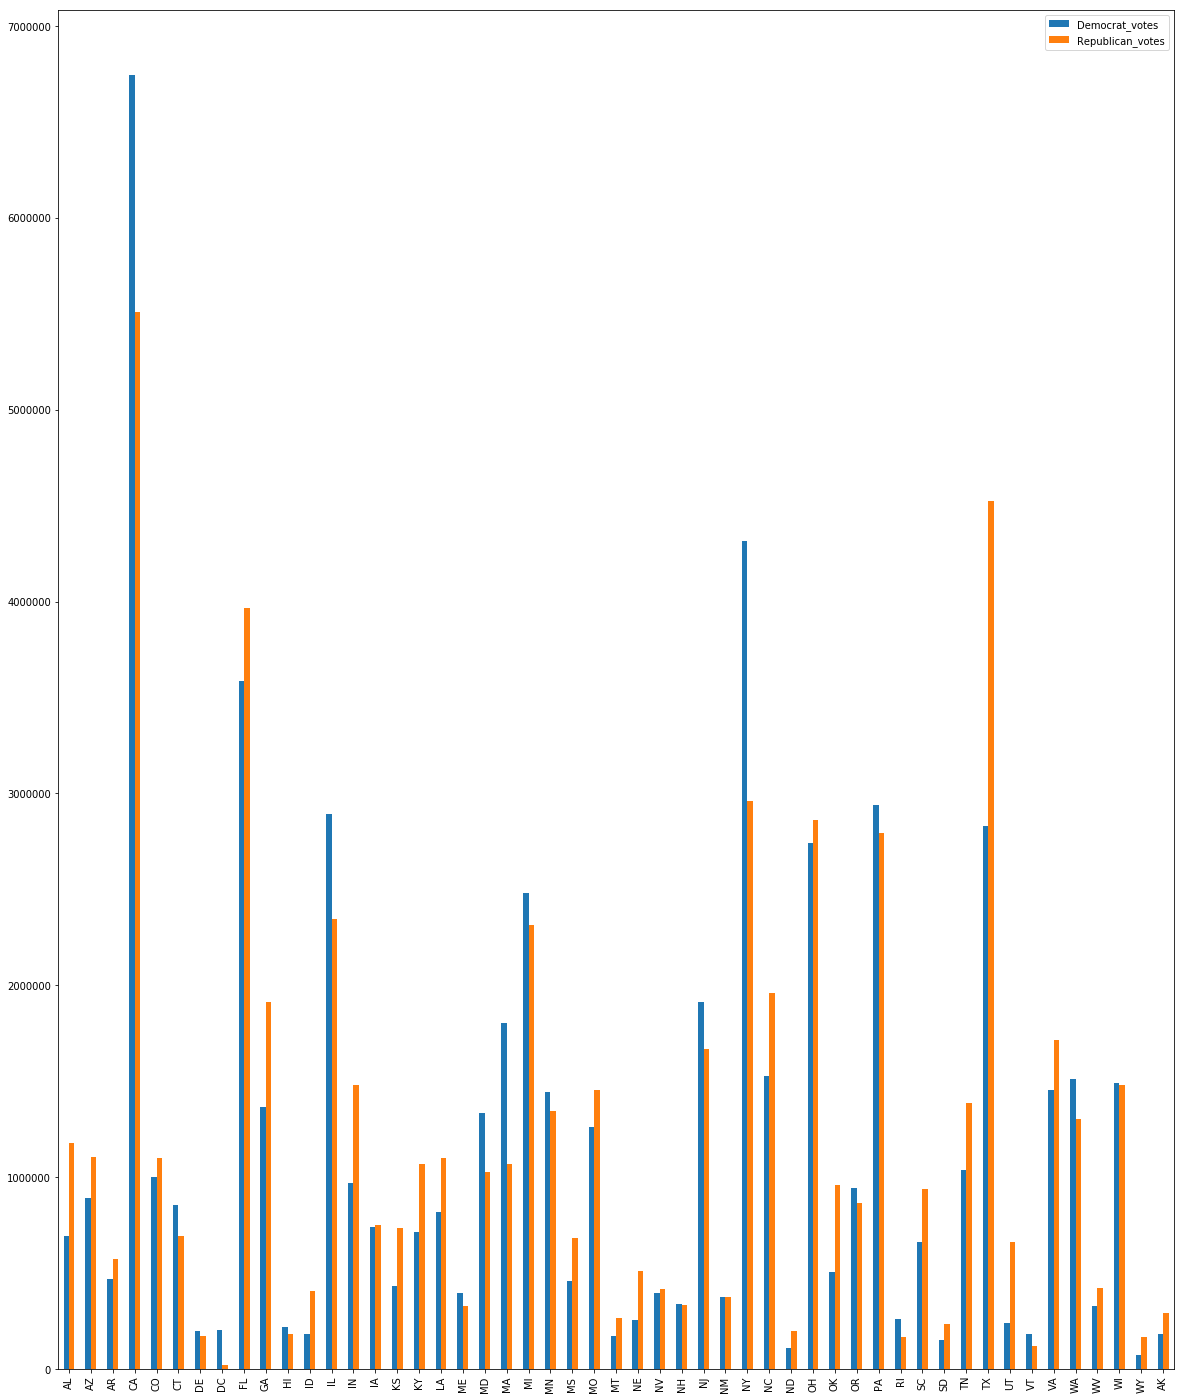

In [63]:
votes04=pd.DataFrame(np.c_[dem04,rep04], index=states)
votes04.columns=['Democrat_votes','Republican_votes']
votes04.plot(kind='bar',figsize = (20,25))
plt.show()

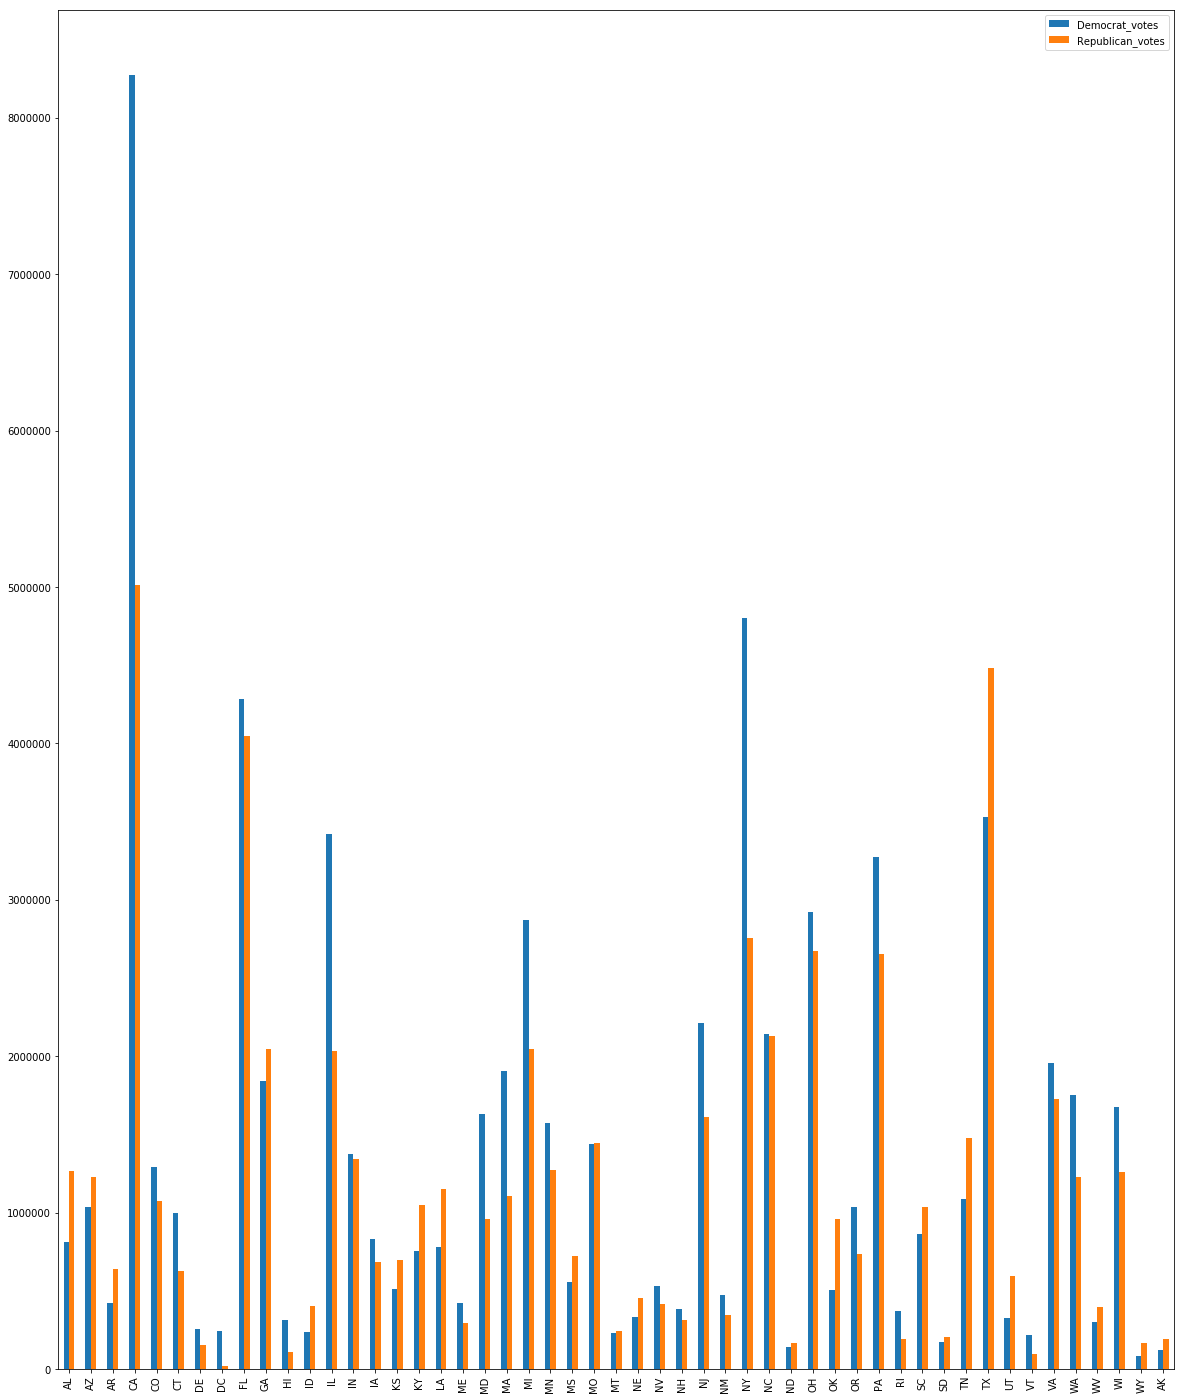

In [64]:
rep08=[]
dem08=[]
for i in states:
    rep08.append(sum(E08[E08.state==i]['vote_rep']))
    dem08.append(sum(E08[E08.state==i]['vote_dem']))

votes08=pd.DataFrame(np.c_[dem08,rep08], index=states)
votes08.columns=['Democrat_votes','Republican_votes']
votes08.plot(kind='bar',figsize = (20,25))
plt.show()

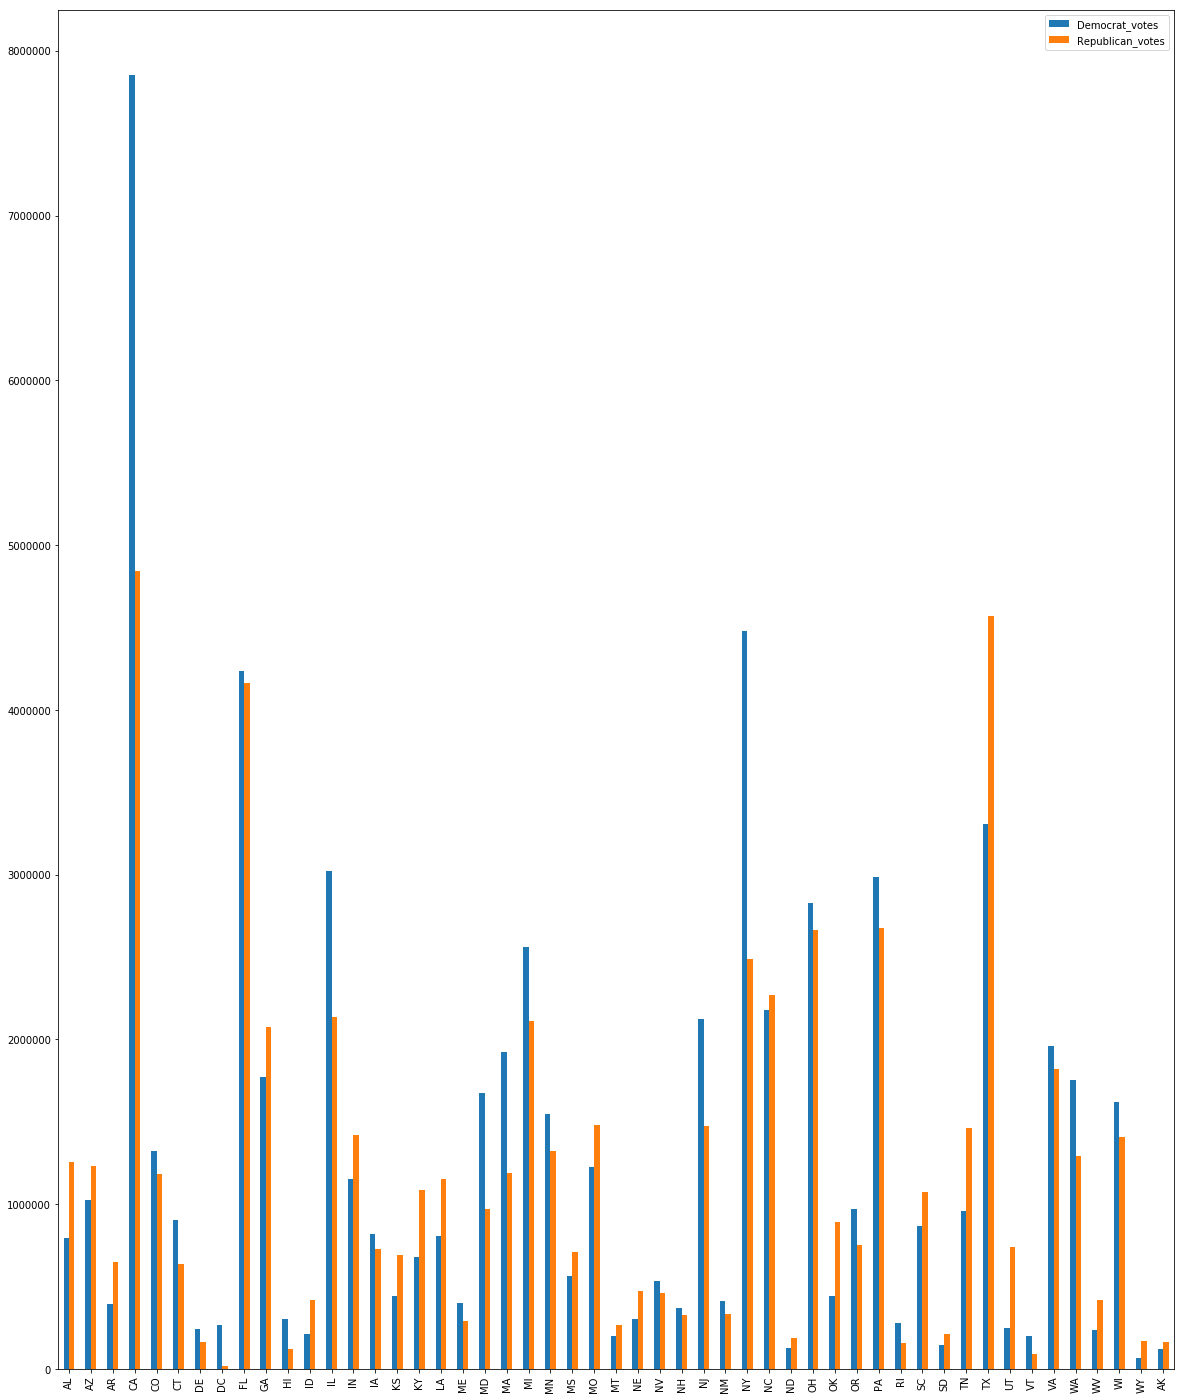

In [65]:
rep12=[]
dem12=[]
for i in states:
    rep12.append(sum(E12[E12.state==i]['vote_rep']))
    dem12.append(sum(E12[E12.state==i]['vote_dem']))

votes12=pd.DataFrame(np.c_[dem12,rep12], index=states)
votes12.columns=['Democrat_votes','Republican_votes']
votes12.plot(kind='bar',figsize = (20,25))
plt.show()

>After thoroughly analyzing the 3 graphs and observing the behavior of each state over the years we found that the states mentioned below can absolutely be considered Swing States

In [66]:
swing_states=data[data.state == 'CO']
swing_states=swing_states.append(data[data.state == 'FL'])
swing_states=swing_states.append(data[data.state == 'IA'])
swing_states=swing_states.append(data[data.state == 'NV'])
swing_states=swing_states.append(data[data.state == 'NC'])
swing_states=swing_states.append(data[data.state == 'OH'])
swing_states.head()

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
215,2004,CO,Adams County,08001,65912,69122,1643,136677,48.2,50.6,1.2,dem,rep,50.6,2.4
216,2004,CO,Alamosa County,08003,3179,3017,83,6279,50.6,48.0,1.3,rep,dem,50.6,2.6
217,2004,CO,Arapahoe County,08005,119475,110262,2628,232365,51.4,47.5,1.1,rep,dem,51.4,3.9
218,2004,CO,Archuleta County,08007,3601,2141,97,5839,61.7,36.7,1.7,rep,dem,61.7,25.0
219,2004,CO,Baca County,08009,1680,483,23,2186,76.9,22.1,1.1,rep,dem,76.9,54.8


In [67]:
swingstates=swing_states['state'].unique()

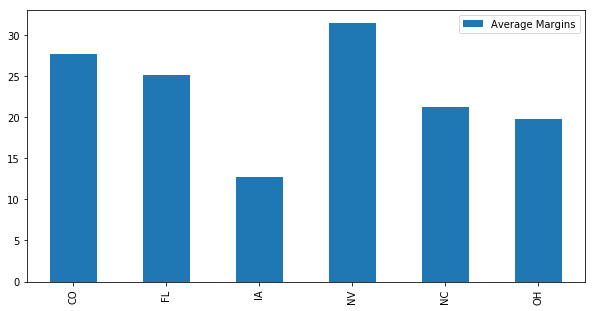

In [73]:
margins_avg=[]
for i in swingstates:
    avg=sum(swing_states[swing_states.state==i]['margin_winner_over_runnerup'])/len(swing_states[swing_states.state==i]['margin_winner_over_runnerup'])
    margins_avg.append(avg)
   
    
M=pd.DataFrame(np.c_[margins_avg], index=swingstates)
M.columns=['Average Margins']
M.plot(kind='bar',figsize = (10,5))
plt.show()

>After determining the swing states we decided to take the state with the lowest margin to prove our theroy which can be observed from the graph above to be IA

# Analyzing IA

In [89]:
IA=data[data.state == 'IA']
IAE04=IA[IA.year == 2004]
IAE08=IA[IA.year == 2008]
IAE12=IA[IA.year == 2012]
counties=IAE04['county'].unique()
IAE04.head()

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
760,2004,IA,Adair County,19001,2402,1844,32,4278,56.1,43.1,0.7,rep,dem,56.1,13.0
761,2004,IA,Adams County,19003,1317,977,31,2325,56.6,42.0,1.3,rep,dem,56.6,14.6
762,2004,IA,Allamakee County,19005,3530,3449,83,7062,50.0,48.8,1.2,rep,dem,50.0,1.2
763,2004,IA,Appanoose County,19007,3340,3063,47,6450,51.8,47.5,0.7,rep,dem,51.8,4.3
764,2004,IA,Audubon County,19009,1958,1608,26,3592,54.5,44.8,0.7,rep,dem,54.5,9.7


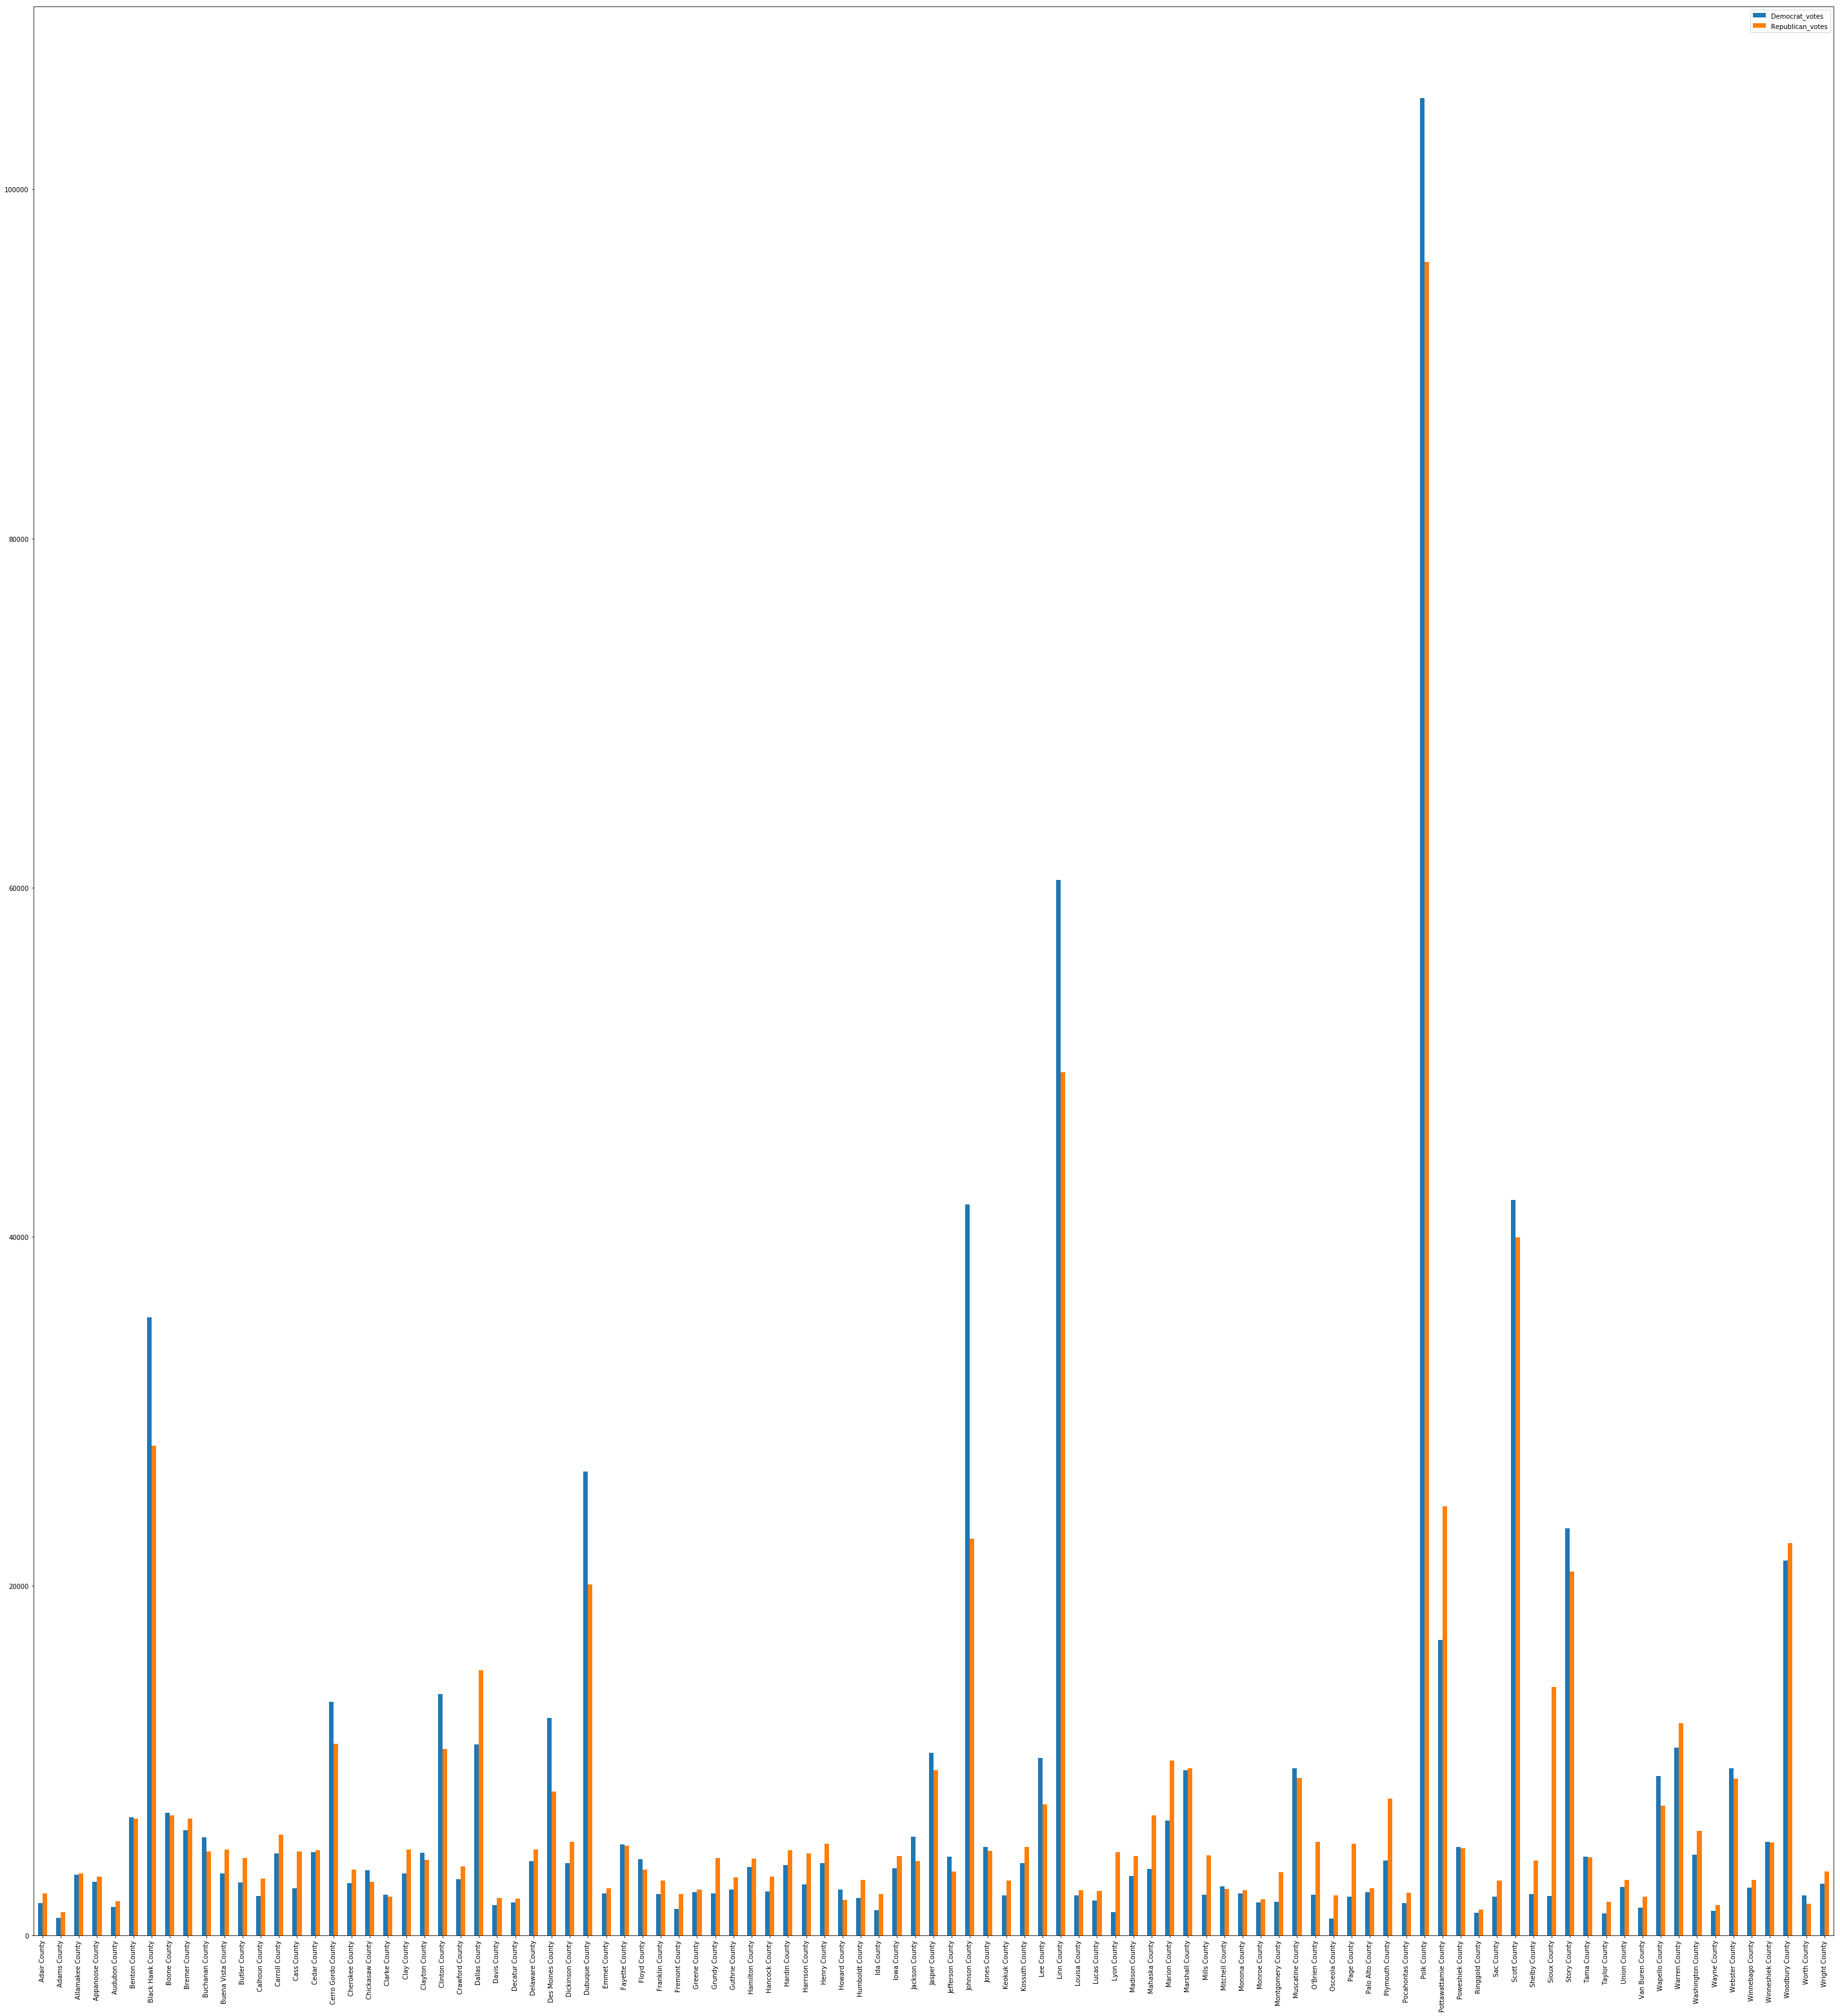

In [91]:
IAE04D=IAE04['vote_dem']
IAE04R=IAE04['vote_rep']
IAvotes04=pd.DataFrame(np.c_[IAE04D,IAE04R], index=counties)
IAvotes04.columns=['Democrat_votes','Republican_votes']
IAvotes04.plot(kind='bar',figsize = (50,55))
plt.show()

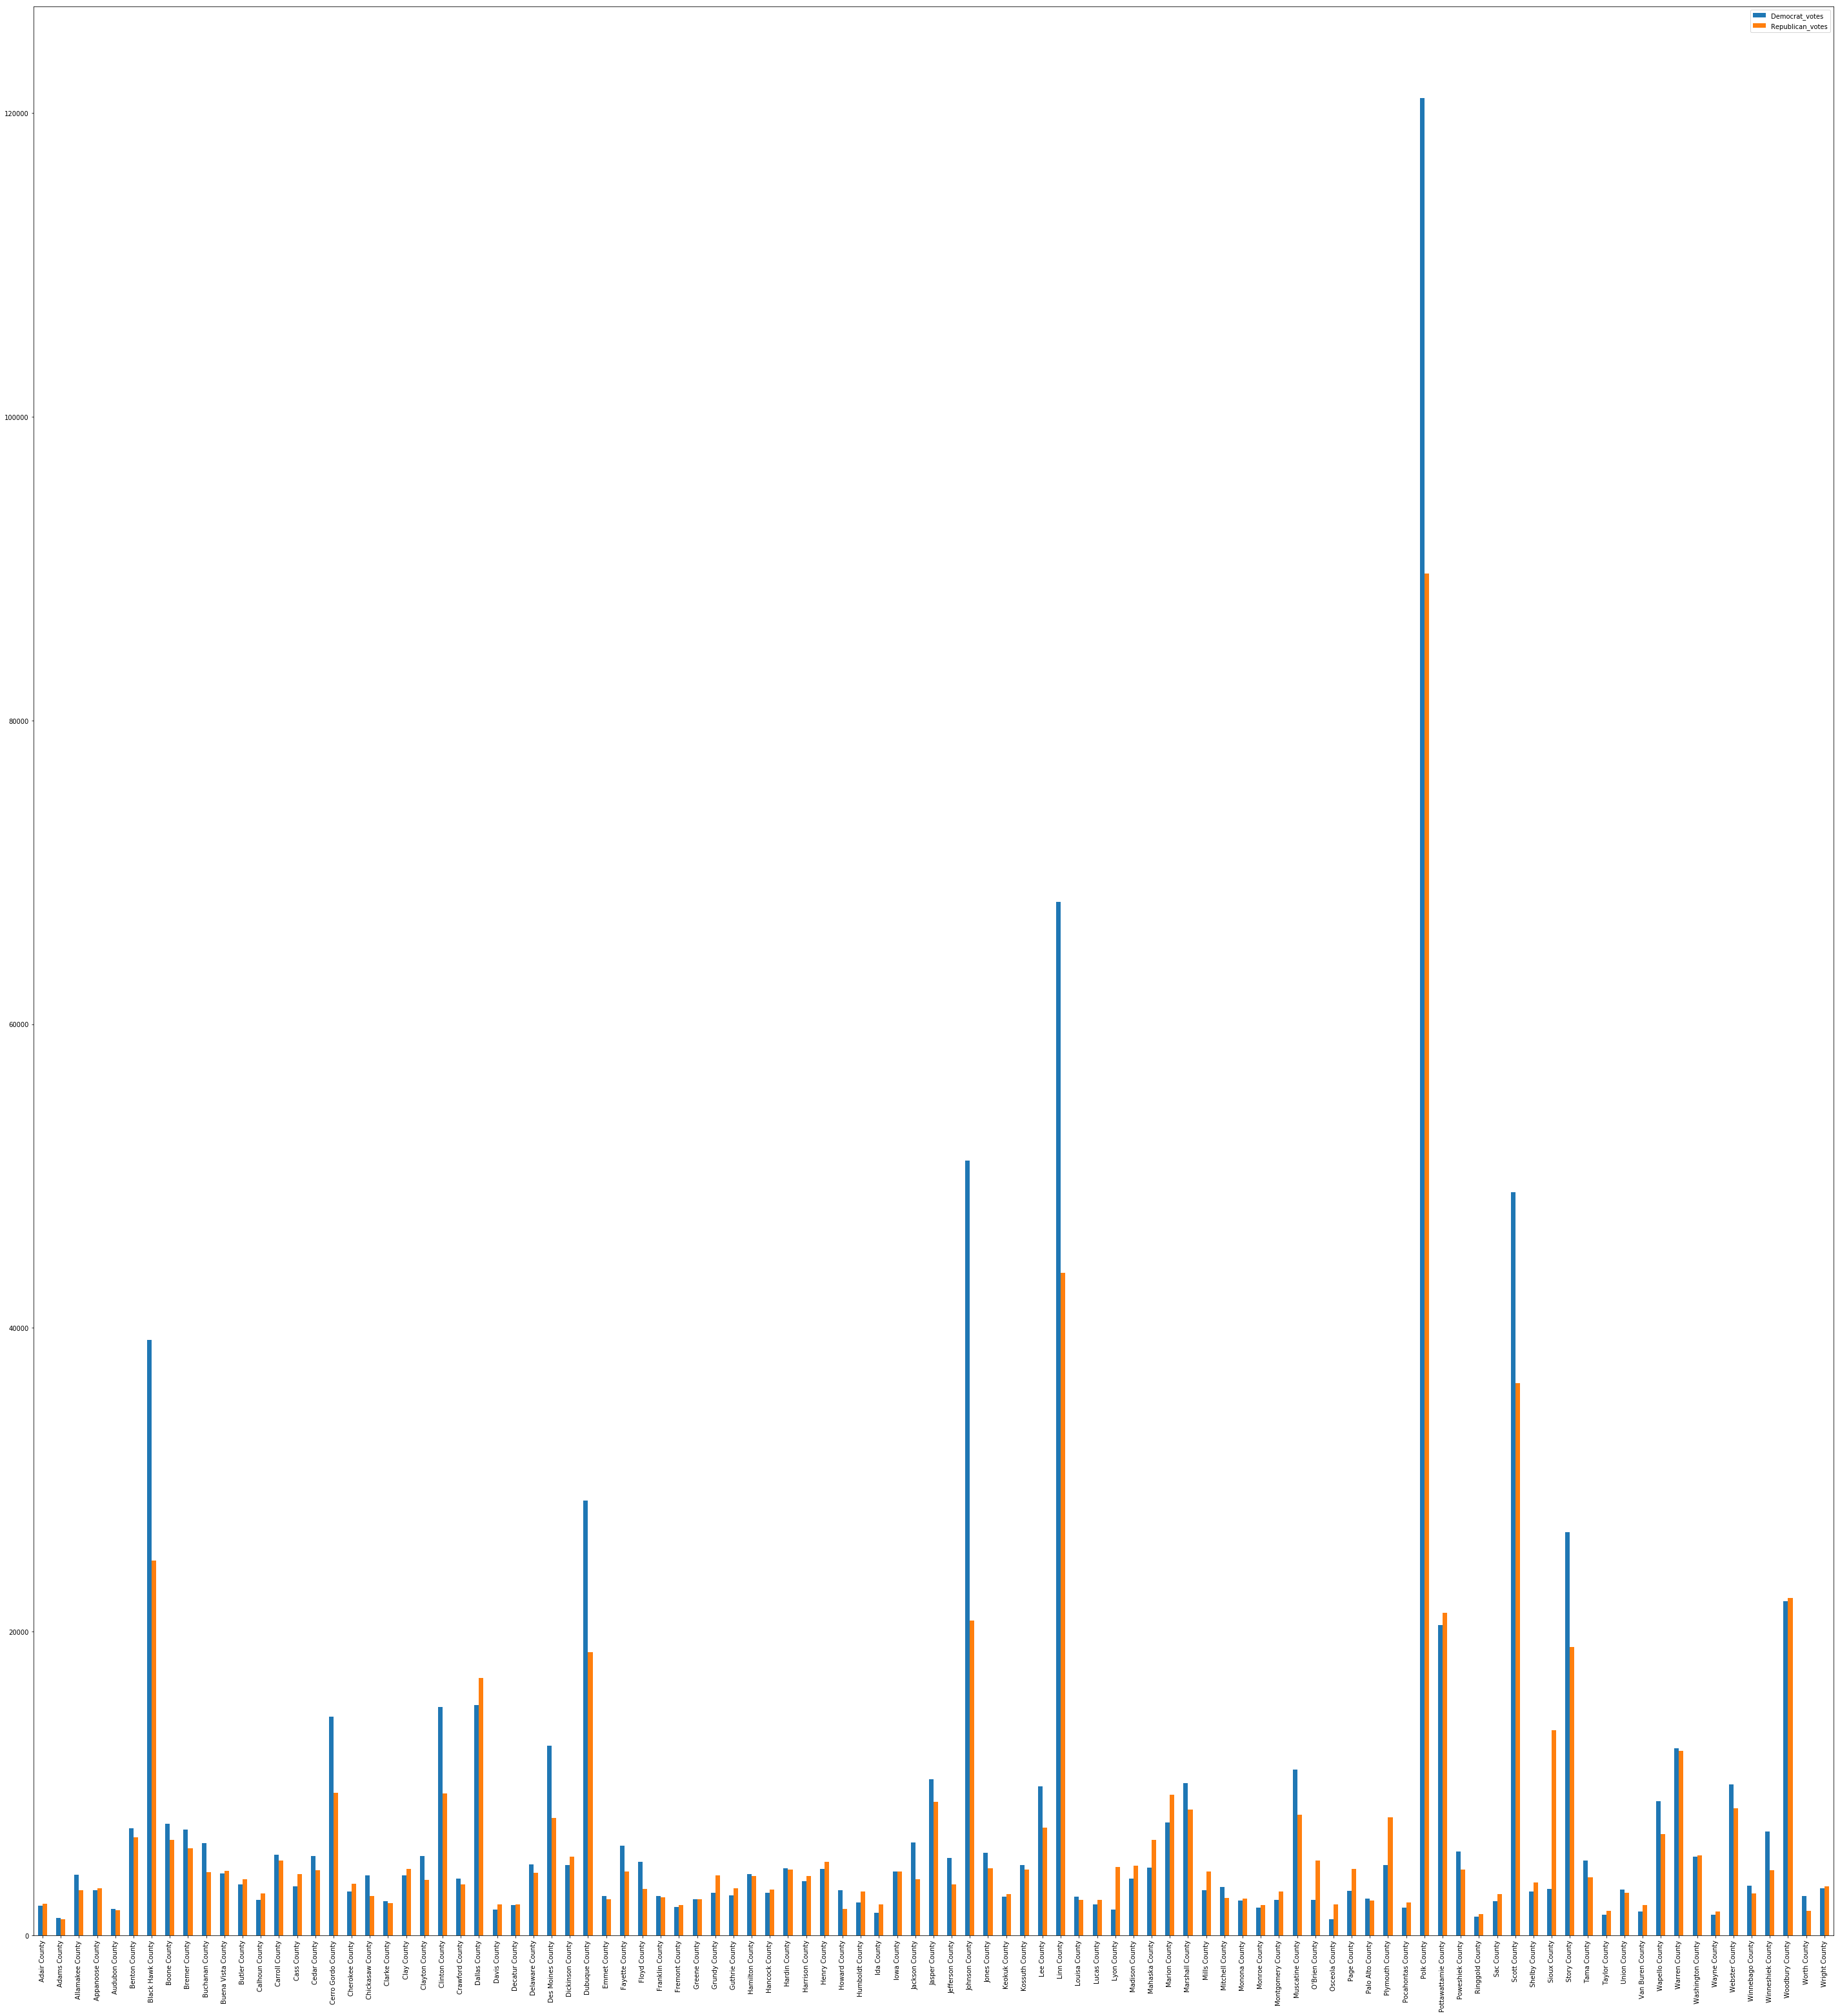

In [92]:
IAE08D=IAE08['vote_dem']
IAE08R=IAE08['vote_rep']
IAvotes08=pd.DataFrame(np.c_[IAE08D,IAE08R], index=counties)
IAvotes08.columns=['Democrat_votes','Republican_votes']
IAvotes08.plot(kind='bar',figsize = (50,55))
plt.show()

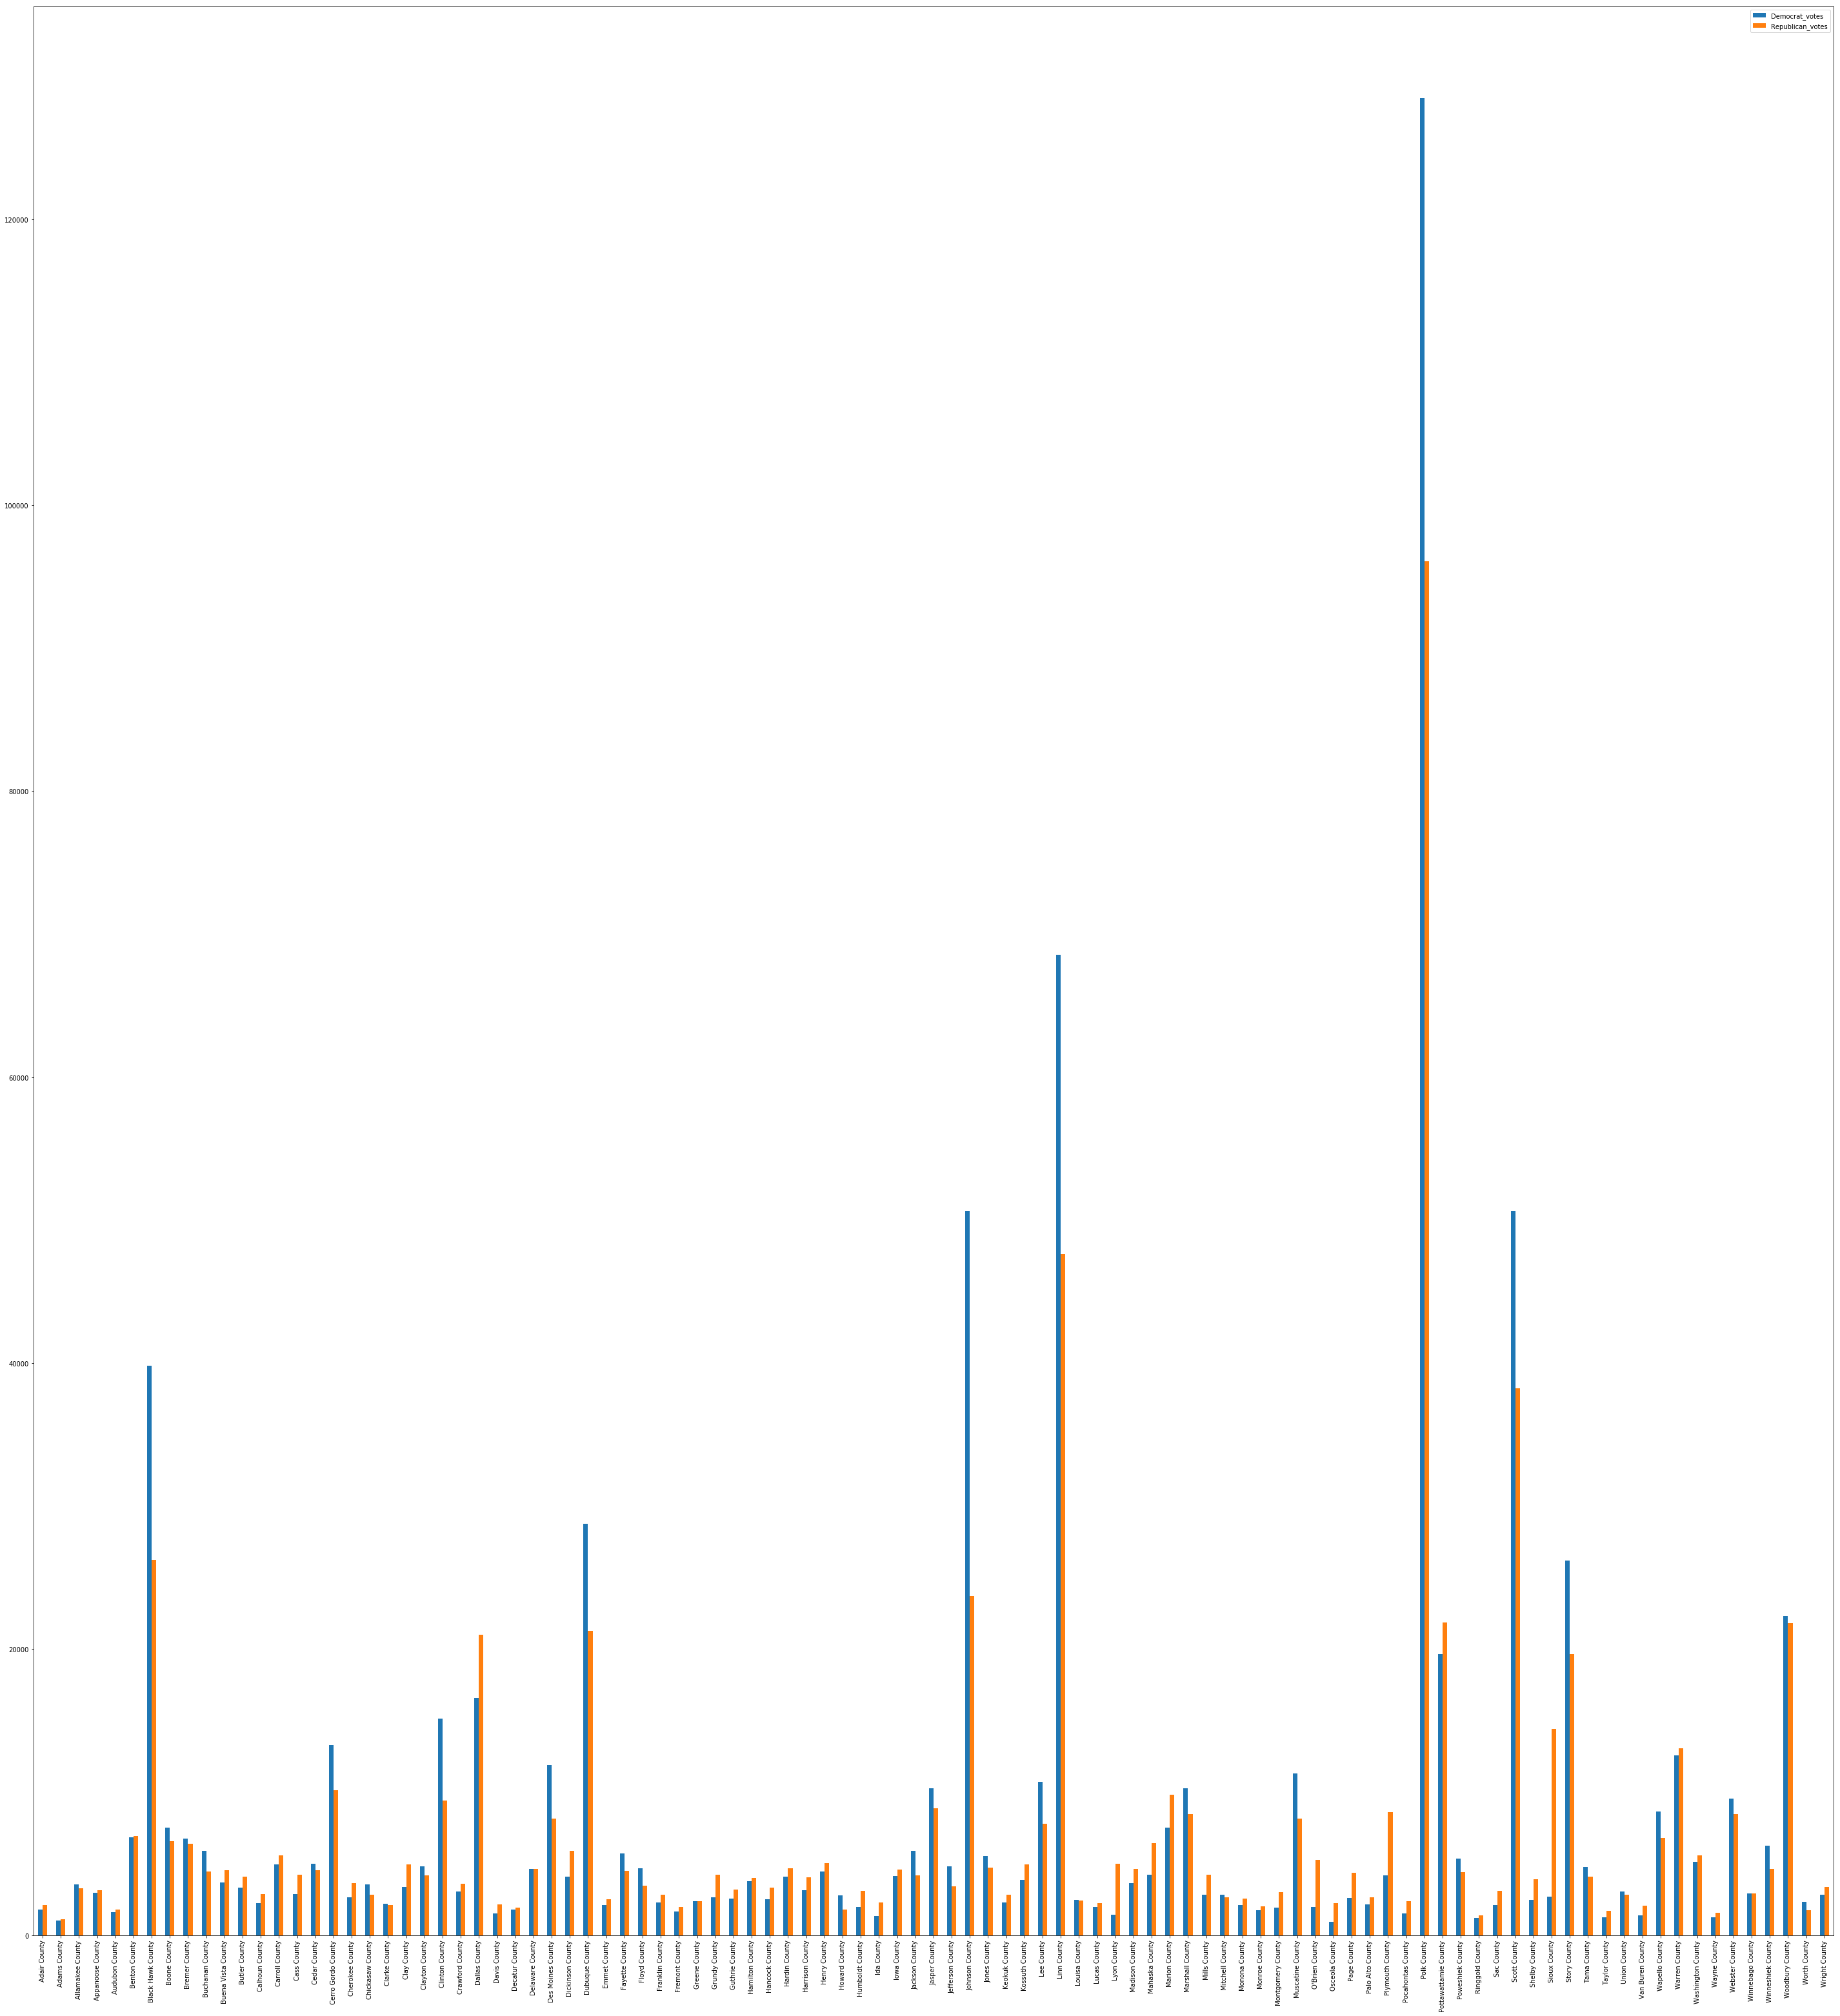

In [93]:
IAE12D=IAE12['vote_dem']
IAE12R=IAE12['vote_rep']
IAvotes12=pd.DataFrame(np.c_[IAE12D,IAE12R], index=counties)
IAvotes12.columns=['Democrat_votes','Republican_votes']
IAvotes12.plot(kind='bar',figsize = (50,55))
plt.show()